In [1]:
import numpy as np
import pandas as pd

f"{np.__version__=}"

"np.__version__='1.26.4'"

In [2]:
from laser_core.propertyset import PropertySet

from laser_generic import Model

In [110]:
scenario = pd.DataFrame(data=[["homenode", 1e6, "47°36′35″N 122°19′59″W"]], columns=["name", "population", "location"])
parameters = PropertySet({"seed": 2, "nticks": 730, "verbose": True, "beta": 0.1})
model = Model(scenario, parameters)

2024-11-21 03:27:59.940763: Creating the generic model…
Initializing the generic model with 1 patches…


In [111]:
from laser_generic.susceptibility import Susceptibility
from laser_generic.transmission import Transmission

model.components = [
    Susceptibility,
    Transmission,
]

In [112]:
from laser_generic.utils import seed_infections_randomly_SI

seed_infections_randomly_SI(model, ninfections=1)

In [113]:
model.run()

2024-11-21 03:28:06.739635: Running the generic model for 730 ticks…


100%|██████████| 730/730 [00:02<00:00, 358.62it/s]

Completed the generic model at 2024-11-21 03:28:08.781049…
Model       :         2,898 µs
Transmission:     1,990,538 µs
Total:            1,993,436 microseconds


(0.0, 250.0)

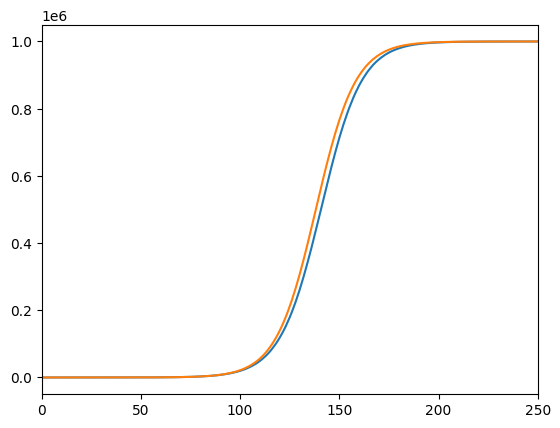

In [114]:
import matplotlib.pyplot as plt

plt.plot(model.patches.cases)
plt.plot(1e6 / (1 + (1e6 - 1) * np.exp(-0.1 * (np.arange(730)))))
plt.xlim([0, 250])
# plt.ylim([100, 150])

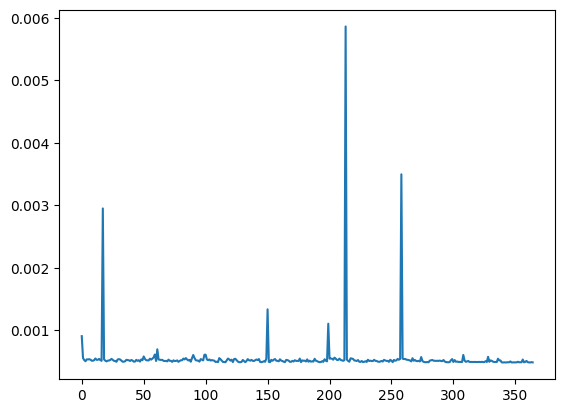

In [8]:
plt.plot(model.patches.timecheck)